In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import pytz
from pytz import common_timezones, all_timezones
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline
from datetime import datetime
import scipy as sp
import statsmodels.api as sm
import statsmodels.formula.api as smf

## Introduction

http://introtopython.org/visualization_earthquakes.html

The main goal of this project is to help you get comforatable making maps of geographical data.

This project will conclude with a list of datasets to explore, to help you find a project of your own to try.

In [2]:
# This just lets the output of the following code samples
#  display inline on this page, at an appropriate size.
from pylab import rcParams

%matplotlib inline
rcParams['figure.figsize'] = (8,6)

## Making a simple map

Let's start out by making a simple map of the world. If you run the following code, you should get a nice map of the globe, with good clean coastlines:

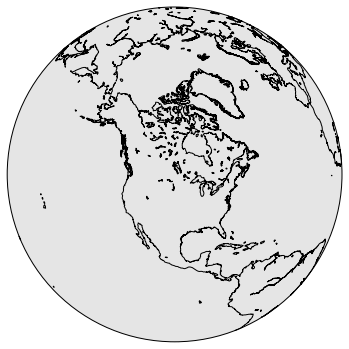

In [3]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
 
# make sure the value of resolution is a lowercase L,
#  for 'low', not a numeral 1
my_map = Basemap(projection='ortho', lat_0=50, lon_0=-100,
              resolution='l', area_thresh=1000.0)
 
my_map.drawcoastlines()
 
plt.show()

## Adding detail

Let's add some more detail to this map, starting with country borders. Add the following lines after 
```map.drawcoastlines()```

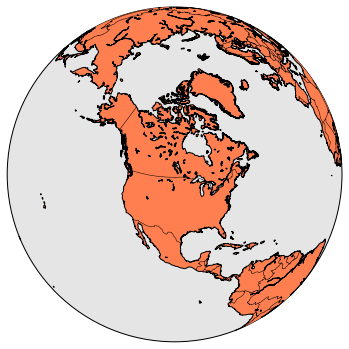

In [4]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
 
# make sure the value of resolution is a lowercase L,
#  for 'low', not a numeral 1
my_map = Basemap(projection='ortho', lat_0=50, lon_0=-100,
              resolution='l', area_thresh=1000.0)
 
my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color='coral')
 
plt.show()

You should see the continents filled in. Now let's clean up the edge of the globe:

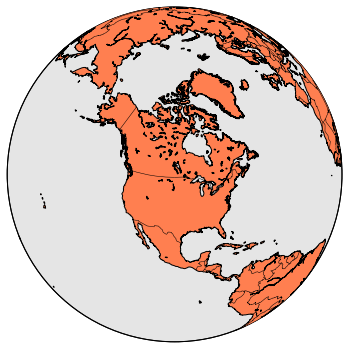

In [5]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
 
# make sure the value of resolution is a lowercase L,
#  for 'low', not a numeral 1
my_map = Basemap(projection='ortho', lat_0=50, lon_0=-100,
              resolution='l', area_thresh=1000.0)
 
my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color='coral')
my_map.drawmapboundary()
 
plt.show()

You should see a cleaner circle outlining the globe. Now let's draw latitude and longitude lines.

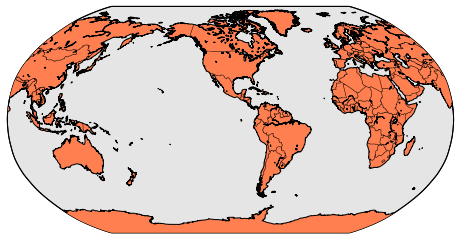

In [35]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

# 35.1740526,-106.5885914

lat = 35.2328
lon = 106.6640

# make sure the value of resolution is a lowercase L,
#  for 'low', not a numeral 1
my_map = Basemap(projection='robin', lat_0=0, lon_0=-100,
              resolution='l', area_thresh=1000.0)
 
my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color='coral')
my_map.drawmapboundary()
 
#my_map.drawmeridians(np.arange(0, 360, 10))
#my_map.drawparallels(np.arange(-90, 90, 10))

x = lat
y = lon

#my_map.plot(x, -y, 'bo', markersize=14)   
    
plt.show()

The ```np.arange()``` arguments tell you where your latitude and longitude lines should begin and end, and how far apart they should be spaced.

Let’s play with two of the map settings, and then we'll move on to plotting data on this globe. Let’s start by adjusting the perspective. Change the latitude and longitude parameters in the original Basemap definition to 0 and -100. When you run the program, you should see your map centered along the equator:

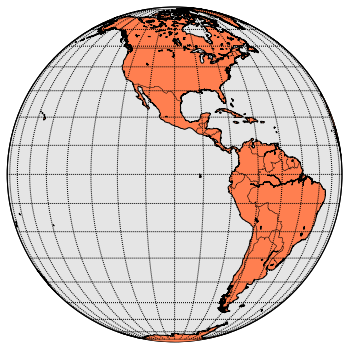

In [8]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
 
# make sure the value of resolution is a lowercase L,
#  for 'low', not a numeral 1
my_map = Basemap(projection='ortho', lat_0=0, lon_0=-100,
              resolution='l', area_thresh=1000.0)
 
my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color='coral')
my_map.drawmapboundary()
 
my_map.drawmeridians(np.arange(0, 360, 10))
my_map.drawparallels(np.arange(-90, 90, 10))
 
plt.show()

Now let's change the kind of map we're producing. Change the projection type to 'robin.' You should end up with a Robinson projection insteasd of a globe:

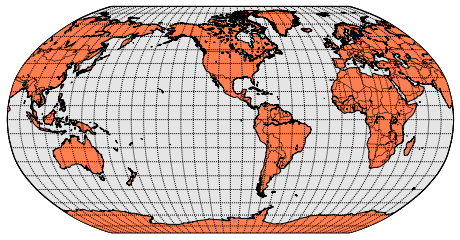

In [9]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
 
# make sure the value of resolution is a lowercase L,
#  for 'low', not a numeral 1
my_map = Basemap(projection='robin', lat_0=0, lon_0=-100,
              resolution='l', area_thresh=1000.0)
 
my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color='coral')
my_map.drawmapboundary()
 
my_map.drawmeridians(np.arange(0, 360, 10))
my_map.drawparallels(np.arange(-90, 90, 10))
 
plt.show()

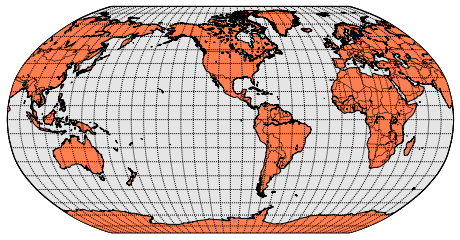

In [10]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
 
# make sure the value of resolution is a lowercase L,
#  for 'low', not a numeral 1
my_map = Basemap(projection='robin', lat_0=50, lon_0=-100,
              resolution='l', area_thresh=1000.0)
 
my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color='coral')
my_map.drawmapboundary()
 
my_map.drawmeridians(np.arange(0, 360, 10))
my_map.drawparallels(np.arange(-90, 90, 10))
 
plt.show()

## Zooming in

Before we move on to plotting points on the map, let’s see how to zoom in on a region. This is good to know because there are many data sets specific to one region of the world, which would get lost when plotted on a map of the whole world. Some projections can not be zoomed in at all, so if things are not working well, make sure to look at the documentation.

I live on Baranof Island in southeast Alaska, so let’s zoom in on that region. One way to zoom in is to specify the latitude and longitude of the lower left and upper right corners of the region you want to show. Let’s use a mercator projection, which supports this method of zooming. The notation for “lower left corner at 136.25 degrees west and 56 degrees north” is:

```
llcrnrlon = -136.25, llcrnrlat = 56.0
```

So, the full set of parameters we'll try is

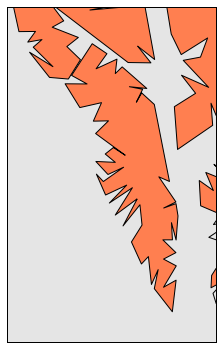

In [11]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
 
# make sure the value of resolution is a lowercase L,
#  for 'low', not a numeral 1
my_map = Basemap(projection='merc', lat_0=57, lon_0=-135,
    resolution = 'l', area_thresh = 1000.0,
    llcrnrlon=-136.25, llcrnrlat=56,
    urcrnrlon=-134.25, urcrnrlat=57.75)
 
my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color='coral')
my_map.drawmapboundary()
 
my_map.drawmeridians(np.arange(0, 360, 30))
my_map.drawparallels(np.arange(-90, 90, 30))
 
plt.show()

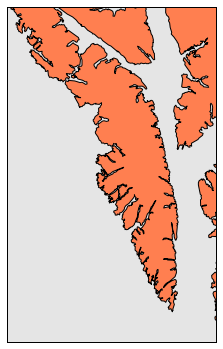

In [12]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
 
# make sure the value of resolution is a lowercase L,
#  for 'low', not a numeral 1
my_map = Basemap(projection='merc', lat_0=57, lon_0=-135,
    resolution = 'h', area_thresh = 1000.0,
    llcrnrlon=-136.25, llcrnrlat=56,
    urcrnrlon=-134.25, urcrnrlat=57.75)
 
my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color='coral')
my_map.drawmapboundary()
 
my_map.drawmeridians(np.arange(0, 360, 30))
my_map.drawparallels(np.arange(-90, 90, 30))
 
plt.show()

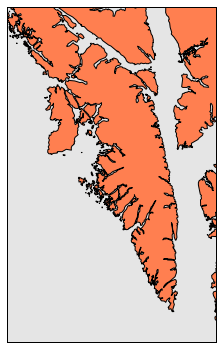

In [13]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
 
# make sure the value of resolution is a lowercase L,
#  for 'low', not a numeral 1
my_map = Basemap(projection='merc', lat_0=57, lon_0=-135,
    resolution = 'h', area_thresh = 0.1,
    llcrnrlon=-136.25, llcrnrlat=56,
    urcrnrlon=-134.25, urcrnrlat=57.75)
 
my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color='coral')
my_map.drawmapboundary()
 
my_map.drawmeridians(np.arange(0, 360, 30))
my_map.drawparallels(np.arange(-90, 90, 30))

plt.show()

## Plotting points on a simple map

It's a testament to the hard work of many other people that we can create a map like the one above in less than 15 lines of code! Now let's add some points to the map. I live in Sitka, the largest community on Baranof Island, so let's add a point showing Sitka's location.

If you ask Google for Sitka's lat, lon it gives:

57.0531 degrees N, 135.3300 degrees W

So anyting that is degrees W is the same as - the same number degrees E?

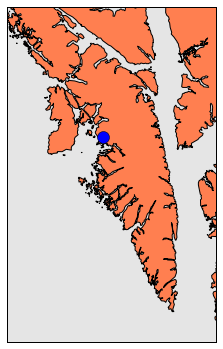

In [14]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
 
my_map = Basemap(projection='merc', lat_0 = 57, lon_0 = -135,
    resolution = 'h', area_thresh = 0.1,
    llcrnrlon=-136.25, llcrnrlat=56.0,
    urcrnrlon=-134.25, urcrnrlat=57.75)
 
my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color = 'coral')
my_map.drawmapboundary()
 
lon = -135.3318
lat = 57.0799
x,y = my_map(lon, lat)
my_map.plot(x, y, 'bo', markersize=12)
 
plt.show()

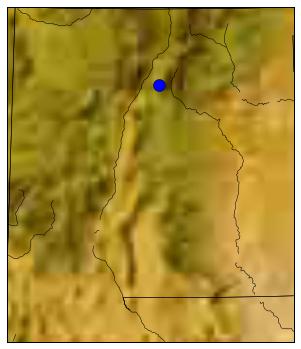

In [40]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
 
my_map = Basemap(projection='lcc', lat_0 = 35, lon_0 = -106,
    resolution = 'h', area_thresh = 0.1,
    llcrnrlon=-109.0, llcrnrlat=31.20,
    urcrnrlon=-103.0, urcrnrlat=37.0)
 
#my_map.drawcoastlines()
#my_map.drawcountries()
#my_map.fillcontinents(color = 'coral')
my_map.drawmapboundary()
my_map.drawstates()
my_map.drawrivers()
#my_map.drawlsmask()
my_map.etopo()

lon = -105.9378
lat = 35.687
x,y = my_map(lon, lat)
my_map.plot(x, y, 'bo', markersize=12)
 
plt.show()

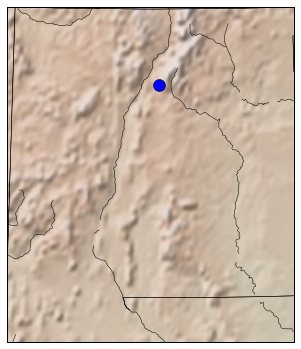

In [41]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
 
my_map = Basemap(projection='lcc', lat_0 = 35, lon_0 = -106,
    resolution = 'h', area_thresh = 0.1,
    llcrnrlon=-109.0, llcrnrlat=31.20,
    urcrnrlon=-103.0, urcrnrlat=37.0)
 
#my_map.drawcoastlines()
#my_map.drawcountries()
#my_map.fillcontinents(color = 'coral')
my_map.drawmapboundary()
my_map.drawstates()
my_map.drawrivers()
#my_map.drawlsmask()
#my_map.etopo()
my_map.shadedrelief()

lon = -105.9378
lat = 35.687
x,y = my_map(lon, lat)
my_map.plot(x, y, 'bo', markersize=12)
 
plt.show()

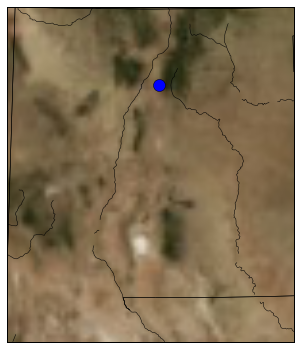

In [42]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
 
my_map = Basemap(projection='lcc', lat_0 = 35, lon_0 = -106,
    resolution = 'h', area_thresh = 0.1,
    llcrnrlon=-109.0, llcrnrlat=31.20,
    urcrnrlon=-103.0, urcrnrlat=37.0)
 
#my_map.drawcoastlines()
#my_map.drawcountries()
#my_map.fillcontinents(color = 'coral')
my_map.drawmapboundary()
my_map.drawstates()
my_map.drawrivers()
#my_map.drawlsmask()
#my_map.etopo()
#my_map.shadedrelief()
my_map.bluemarble()


lon = -105.9378
lat = 35.687
x,y = my_map(lon, lat)
my_map.plot(x, y, 'bo', markersize=12)
 
plt.show()

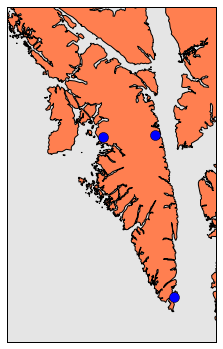

In [15]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
 
my_map = Basemap(projection='merc', lat_0 = 57, lon_0 = -135,
    resolution = 'h', area_thresh = 0.1,
    llcrnrlon=-136.25, llcrnrlat=56.0,
    urcrnrlon=-134.25, urcrnrlat=57.75)
 
my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color = 'coral')
my_map.drawmapboundary()
 
lons = [-135.3318, -134.8331, -134.6572]
lats = [57.0799, 57.0894, 56.2399]
x,y = my_map(lons, lats)
my_map.plot(x, y, 'bo', markersize=10)
 
plt.show()

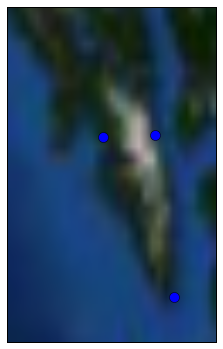

In [46]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
 
my_map = Basemap(projection='merc', lat_0 = 57, lon_0 = -135,
    resolution = 'h', area_thresh = 0.1,
    llcrnrlon=-136.25, llcrnrlat=56.0,
    urcrnrlon=-134.25, urcrnrlat=57.75)
 
#my_map.drawcoastlines()
#my_map.drawcountries()
#my_map.fillcontinents(color = 'coral')
my_map.drawmapboundary()
#my_map.etopo()
#my_map.shadedrelief()
my_map.bluemarble()    
    
lons = [-135.3318, -134.8331, -134.6572]
lats = [57.0799, 57.0894, 56.2399]
x,y = my_map(lons, lats)
my_map.plot(x, y, 'bo', markersize=10)
 
plt.show()

## Labeling points

Now let's label these three points. We make a list of our labels, and loop through that list. We need to include the x and y values for each point in this loop, so Basemap can figure out where to place each label.

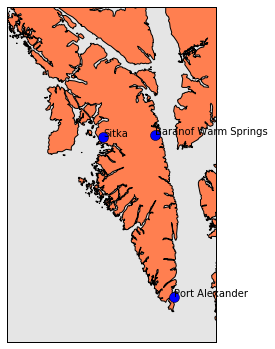

In [47]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
 
my_map = Basemap(projection='merc', lat_0 = 57, lon_0 = -135,
    resolution = 'h', area_thresh = 0.1,
    llcrnrlon=-136.25, llcrnrlat=56.0,
    urcrnrlon=-134.25, urcrnrlat=57.75)
 
my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color = 'coral')
my_map.drawmapboundary()
 
lons = [-135.3318, -134.8331, -134.6572]
lats = [57.0799, 57.0894, 56.2399]
x,y = my_map(lons, lats)
my_map.plot(x, y, 'bo', markersize=10)
 
labels = ['Sitka', 'Baranof Warm Springs', 'Port Alexander']
for label, xpt, ypt in zip(labels, x, y):
    plt.text(xpt, ypt, label)
 
plt.show()

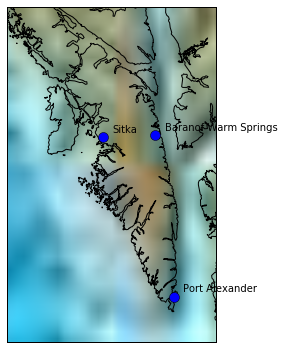

In [51]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
 
my_map = Basemap(projection='merc', lat_0 = 57, lon_0 = -135,
    resolution = 'h', area_thresh = 0.1,
    llcrnrlon=-136.25, llcrnrlat=56.0,
    urcrnrlon=-134.25, urcrnrlat=57.75)
 
my_map.drawcoastlines()
my_map.drawcountries()
#my_map.fillcontinents(color = 'coral')
my_map.drawmapboundary()
my_map.etopo()


lons = [-135.3318, -134.8331, -134.6572]
lats = [57.0799, 57.0894, 56.2399]
x,y = my_map(lons, lats)
my_map.plot(x, y, 'bo', markersize=10)
 
labels = ['Sitka', 'Baranof Warm Springs', 'Port Alexander']
for label, xpt, ypt in zip(labels, x, y):
    plt.text(xpt+10000, ypt+5000, label)
 
plt.show()



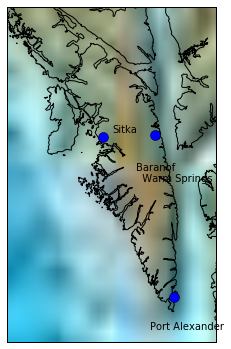

In [52]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
 
my_map = Basemap(projection='merc', lat_0 = 57, lon_0 = -135,
    resolution = 'h', area_thresh = 0.1,
    llcrnrlon=-136.25, llcrnrlat=56.0,
    urcrnrlon=-134.25, urcrnrlat=57.75)
 
my_map.drawcoastlines()
my_map.drawcountries()
#my_map.fillcontinents(color = 'coral')
my_map.drawmapboundary()
my_map.etopo()


lons = [-135.3318, -134.8331, -134.6572]
lats = [57.0799, 57.0894, 56.2399]
x,y = my_map(lons, lats)
my_map.plot(x, y, 'bo', markersize=10)
 
labels = ['Sitka', 'Baranof\n  Warm Springs', 'Port Alexander']
x_offsets = [10000, -20000, -25000]
y_offsets = [5000, -50000, -35000]

for label, xpt, ypt, x_offset, y_offset in zip(labels, x, y, x_offsets, y_offsets):
    plt.text(xpt+x_offset, ypt+y_offset, label)
 
plt.show()

There's no easy way to keep "Baranof Warm Springs" from crossing a border, but hte use of newlines within a label makes it a little more legible: Now that we know how to add points to a map, we can move on to larget data sets.

## A global earthquake dataset

The US government maintains a set of live feeds http://earthquake.usgs.gov/earthquakes/feed/v1.0/ of earthquake-related data from recent seismic events. You can choose to examine data from the last hour, throught the last thirty days. You can choose to exmaine data from events that have a variety of magnitudes. For this project, we'll use a dataset that contains all seismic events over the last seven days, which have a magnitude of 1.0 or greater.

You can also choose from a variety of formats. In this first example, we'll look at how to parse a file in the csv format. There are more convenient formats to work with such as json, but not all datasets are neatly organized. We'll start out parsing a csv file, and then perhaps take a look at how to work with the json format.

To follow this project on your own system, go to the USGS source http://earthquake.usgs.gov/earthquakes/feed/v1.0/csv.php
for csv files of earthquake data and download the file "M 1.0+ Earthquakes" under the "Past 7 days" header. If you like, here is a direct link http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/1.0_week.csv to that file. This data is updated every 5 minutes, so your data wont match what you see here exactly. The format should match, but the data itself wont match.